In [1099]:
# Load dependencies and setup

import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib as maplotlib
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(15,5)

In [1101]:
# Load and preview dataset

raw_df = pd.read_csv('./data/fuel-inventories.csv', index_col='Month', parse_dates=True, decimal='.')
raw_df

,Sale of Automotive Gasoline,Import of Automotive Gasoline,Production of Automotive Gasoline,Export of Automotive Gasoline,Inventory of Automotive Gasoline,All Data in ML
Month,,,,,,
2010-01-07,1622.0,207.3,1493.1,22.0,56.4,NaN
2010-01-08,1629.0,151.9,1429.6,22.7,-13.8,NaN
2010-01-09,1508.9,155.8,1392.6,14.2,11.5,NaN
2010-01-10,1646.1,225.0,1362.6,16.7,-63.7,NaN
2010-01-11,1648.2,271.5,1366.9,20.7,-94.2,NaN
...,...,...,...,...,...,...
2023-01-12,1394.0,965.3,493.1,0.6,-1448.8,NaN
2024-01-01,1345.8,850.3,484.9,0.2,-1459.6,NaN
2024-01-02,1324.4,911.9,494.3,0.0,-1377.8,NaN


In [1103]:
# Drop unnecessary tables

raw_dropped_df = raw_df.drop(['All Data in ML'], axis=1)
raw_dropped_df

,Sale of Automotive Gasoline,Import of Automotive Gasoline,Production of Automotive Gasoline,Export of Automotive Gasoline,Inventory of Automotive Gasoline
Month,,,,,
2010-01-07,1622.0,207.3,1493.1,22.0,56.4
2010-01-08,1629.0,151.9,1429.6,22.7,-13.8
2010-01-09,1508.9,155.8,1392.6,14.2,11.5
2010-01-10,1646.1,225.0,1362.6,16.7,-63.7
2010-01-11,1648.2,271.5,1366.9,20.7,-94.2
...,...,...,...,...,...
2023-01-12,1394.0,965.3,493.1,0.6,-1448.8
2024-01-01,1345.8,850.3,484.9,0.2,-1459.6
2024-01-02,1324.4,911.9,494.3,0.0,-1377.8


In [1105]:
# Rename columns and dataframe

raw_dropped_df.rename(columns={'Sale of Automotive Gasoline': 'Sale', 'Import of Automotive Gasoline': 'Import',
                                               'Production of Automotive Gasoline': 'Production', 'Export of Automotive Gasoline': 'Export',
                                               'Inventory of Automotive Gasoline': 'Inventory'}, inplace=True)
raw_renamed_df = raw_dropped_df
raw_renamed_df

,Sale,Import,Production,Export,Inventory
Month,,,,,
2010-01-07,1622.0,207.3,1493.1,22.0,56.4
2010-01-08,1629.0,151.9,1429.6,22.7,-13.8
2010-01-09,1508.9,155.8,1392.6,14.2,11.5
2010-01-10,1646.1,225.0,1362.6,16.7,-63.7
2010-01-11,1648.2,271.5,1366.9,20.7,-94.2
...,...,...,...,...,...
2023-01-12,1394.0,965.3,493.1,0.6,-1448.8
2024-01-01,1345.8,850.3,484.9,0.2,-1459.6
2024-01-02,1324.4,911.9,494.3,0.0,-1377.8


In [1107]:
# Check data types of each column

raw_renamed_df.dtypes

Sale          float64
Import        float64
Production    float64
Export        float64
Inventory     float64
dtype: object

In [1109]:
# Check data type of index to ensure it is datetime format

index_dtype = raw_renamed_df.index.dtype
print(index_dtype)

datetime64[ns]


In [1111]:
# Seperate each month/column as a new dataframe

sale_df = raw_renamed_df.drop(['Import', 'Production', 'Export', 'Inventory'], axis=1)
import_df = raw_renamed_df.drop(['Sale', 'Production', 'Export', 'Inventory'], axis=1)
production_df = raw_renamed_df.drop(['Sale', 'Import', 'Export', 'Inventory'], axis=1)
export_df = raw_renamed_df.drop(['Sale', 'Import', 'Production', 'Inventory'], axis=1)
inventory_df = raw_renamed_df.drop(['Sale', 'Import', 'Production', 'Export'], axis=1)

print(sale_df.head())
print(import_df.head())
print(production_df.head())
print(export_df.head())
print(inventory_df.head())

              Sale
Month             
2010-01-07  1622.0
2010-01-08  1629.0
2010-01-09  1508.9
2010-01-10  1646.1
2010-01-11  1648.2
            Import
Month             
2010-01-07   207.3
2010-01-08   151.9
2010-01-09   155.8
2010-01-10   225.0
2010-01-11   271.5
            Production
Month                 
2010-01-07      1493.1
2010-01-08      1429.6
2010-01-09      1392.6
2010-01-10      1362.6
2010-01-11      1366.9
            Export
Month             
2010-01-07    22.0
2010-01-08    22.7
2010-01-09    14.2
2010-01-10    16.7
2010-01-11    20.7
            Inventory
Month                
2010-01-07       56.4
2010-01-08      -13.8
2010-01-09       11.5
2010-01-10      -63.7
2010-01-11      -94.2


In [1113]:
# Re-check data types of each column

raw_renamed_df.dtypes

Sale          float64
Import        float64
Production    float64
Export        float64
Inventory     float64
dtype: object

In [1115]:
# Prepare for Prophet
# Reset indexes

sale_df = sale_df.reset_index()
import_df = import_df.reset_index()
production_df = production_df.reset_index()
export_df = export_df.reset_index()
inventory_df = inventory_df.reset_index()

print(sale_df.head())
print(import_df.head())
print(production_df.head())
print(export_df.head())
print(inventory_df.head())

       Month    Sale
0 2010-01-07  1622.0
1 2010-01-08  1629.0
2 2010-01-09  1508.9
3 2010-01-10  1646.1
4 2010-01-11  1648.2
       Month  Import
0 2010-01-07   207.3
1 2010-01-08   151.9
2 2010-01-09   155.8
3 2010-01-10   225.0
4 2010-01-11   271.5
       Month  Production
0 2010-01-07      1493.1
1 2010-01-08      1429.6
2 2010-01-09      1392.6
3 2010-01-10      1362.6
4 2010-01-11      1366.9
       Month  Export
0 2010-01-07    22.0
1 2010-01-08    22.7
2 2010-01-09    14.2
3 2010-01-10    16.7
4 2010-01-11    20.7
       Month  Inventory
0 2010-01-07       56.4
1 2010-01-08      -13.8
2 2010-01-09       11.5
3 2010-01-10      -63.7
4 2010-01-11      -94.2


In [1117]:
# Rename 'Month' and 'Sale' to 'ds' and 'y', respectively

sale_df = sale_df.rename(columns={'Month':'ds', 'Sale':'y'})
import_df = import_df.rename(columns={'Month':'ds', 'Import':'y'})
production_df = production_df.rename(columns={'Month':'ds', 'Production':'y'})
export_df = export_df.rename(columns={'Month':'ds', 'Export':'y'})
inventory_df = inventory_df.rename(columns={'Month':'ds', 'Inventory':'y'})

print(sale_df.head())
print(import_df.head())
print(production_df.head())
print(export_df.head())
print(inventory_df.head())

          ds       y
0 2010-01-07  1622.0
1 2010-01-08  1629.0
2 2010-01-09  1508.9
3 2010-01-10  1646.1
4 2010-01-11  1648.2
          ds      y
0 2010-01-07  207.3
1 2010-01-08  151.9
2 2010-01-09  155.8
3 2010-01-10  225.0
4 2010-01-11  271.5
          ds       y
0 2010-01-07  1493.1
1 2010-01-08  1429.6
2 2010-01-09  1392.6
3 2010-01-10  1362.6
4 2010-01-11  1366.9
          ds     y
0 2010-01-07  22.0
1 2010-01-08  22.7
2 2010-01-09  14.2
3 2010-01-10  16.7
4 2010-01-11  20.7
          ds     y
0 2010-01-07  56.4
1 2010-01-08 -13.8
2 2010-01-09  11.5
3 2010-01-10 -63.7
4 2010-01-11 -94.2


<Axes: xlabel='ds'>

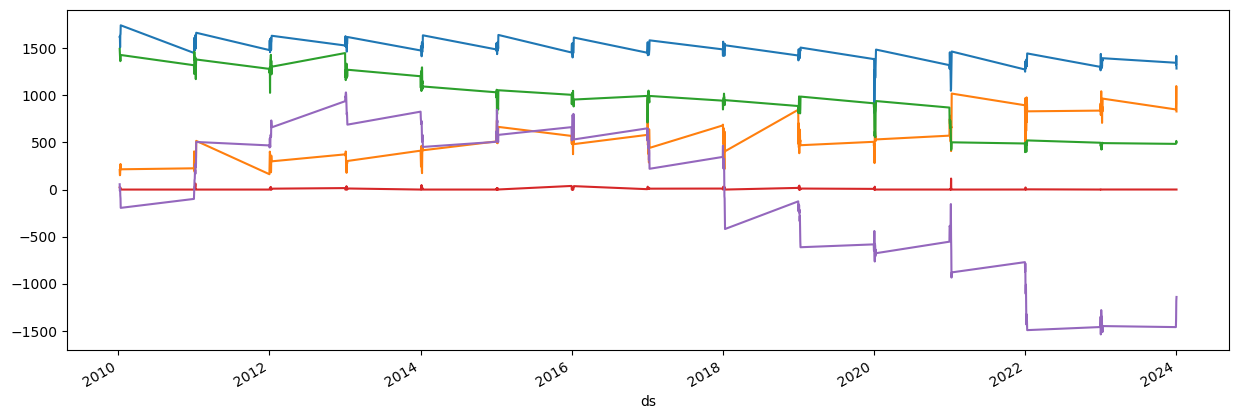

In [1119]:
# Set indexes and preview plots

sale_df.set_index('ds').y.plot()
import_df.set_index('ds').y.plot()
production_df.set_index('ds').y.plot()
export_df.set_index('ds').y.plot()
inventory_df.set_index('ds').y.plot()

In [1121]:
# Create models

model_sale = Prophet(weekly_seasonality=True, daily_seasonality=True)
model_sale.fit(sale_df);

model_import = Prophet(weekly_seasonality=True, daily_seasonality=True)
model_import.fit(import_df);

model_production = Prophet(weekly_seasonality=True, daily_seasonality=True)
model_production.fit(production_df);

model_export = Prophet(weekly_seasonality=True, daily_seasonality=True)
model_export.fit(export_df);

model_inventory = Prophet(weekly_seasonality=True, daily_seasonality=True)
model_inventory.fit(inventory_df);

22:07:55 - cmdstanpy - INFO - Chain [1] start processing
22:07:55 - cmdstanpy - INFO - Chain [1] done processing
22:07:55 - cmdstanpy - INFO - Chain [1] start processing
22:07:55 - cmdstanpy - INFO - Chain [1] done processing
22:07:56 - cmdstanpy - INFO - Chain [1] start processing
22:07:56 - cmdstanpy - INFO - Chain [1] done processing
22:07:56 - cmdstanpy - INFO - Chain [1] start processing
22:07:56 - cmdstanpy - INFO - Chain [1] done processing
22:07:56 - cmdstanpy - INFO - Chain [1] start processing
22:07:56 - cmdstanpy - INFO - Chain [1] done processing


In [1123]:
# Add future dates to models (5 years / 60 months)

future_sale = model_sale.make_future_dataframe(periods=60, freq = 'ME')
future_import = model_import.make_future_dataframe(periods=60, freq = 'ME')
future_production = model_production.make_future_dataframe(periods=60, freq = 'ME')
future_export = model_export.make_future_dataframe(periods=60, freq = 'ME')
future_inventory = model_inventory.make_future_dataframe(periods=60, freq = 'ME')

print(future_sale.head())
print(future_import.head())
print(future_production.head())
print(future_export.head())
print(future_inventory.head())

          ds
0 2010-01-07
1 2010-01-08
2 2010-01-09
3 2010-01-10
4 2010-01-11
          ds
0 2010-01-07
1 2010-01-08
2 2010-01-09
3 2010-01-10
4 2010-01-11
          ds
0 2010-01-07
1 2010-01-08
2 2010-01-09
3 2010-01-10
4 2010-01-11
          ds
0 2010-01-07
1 2010-01-08
2 2010-01-09
3 2010-01-10
4 2010-01-11
          ds
0 2010-01-07
1 2010-01-08
2 2010-01-09
3 2010-01-10
4 2010-01-11


In [1125]:
# Forecast and run through Prophet model

forecast_sale = model_sale.predict(future_sale)
forecast_import = model_import.predict(future_import)
forecast_production = model_production.predict(future_production)
forecast_export = model_export.predict(future_export)
forecast_inventory = model_inventory.predict(future_inventory)

print(forecast_sale.head())
print(forecast_import.head())
print(forecast_production.head())
print(forecast_export.head())
print(forecast_inventory.head())

          ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2010-01-07  1639.978096  1482.074014  1676.733761  1639.978096  1639.978096   
1 2010-01-08  1639.932256  1465.914085  1663.267541  1639.932256  1639.932256   
2 2010-01-09  1639.886417  1450.324692  1657.647946  1639.886417  1639.886417   
3 2010-01-10  1639.840578  1498.272343  1700.257971  1639.840578  1639.840578   
4 2010-01-11  1639.794739  1545.396195  1738.269587  1639.794739  1639.794739   

   additive_terms  additive_terms_lower  additive_terms_upper      daily  ...  \
0      -61.033000            -61.033000            -61.033000  91.514882  ...   
1      -74.208895            -74.208895            -74.208895  91.514882  ...   
2      -87.044867            -87.044867            -87.044867  91.514882  ...   
3      -37.142350            -37.142350            -37.142350  91.514882  ...   
4        4.560800              4.560800              4.560800  91.514882  ...   

      weekly  weekly_lower

In [1127]:
# Drop surplus columns

forecast_sale[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast_import[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast_production[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast_export[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast_inventory[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
221,2028-08-31,-3311.475206,-3664.638137,-2962.575900
222,2028-09-30,-3432.152165,-3767.692202,-3083.209309
223,2028-10-31,-3467.037680,-3835.459600,-3124.638710
224,2028-11-30,-3290.291898,-3650.278380,-2943.195754
225,2028-12-31,-2975.806473,-3316.365368,-2625.209914


C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


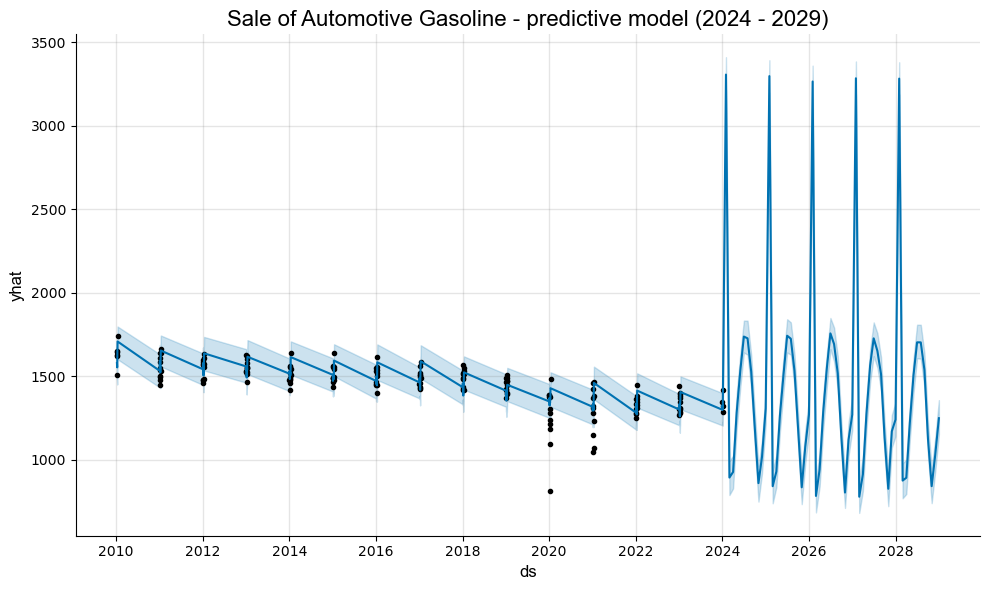

In [1129]:
# Plot forecast - Sale

model_sale.plot(forecast_sale);

# Font families
font_1 = {'family':'arial','color':'black','size':16}
font_2 = {'family':'arial','color':'black','size':12}

# Labels
plt.title("Sale of Automotive Gasoline - predictive model (2024 - 2029)", fontdict = font_1)
plt.xlabel("ds", fontdict = font_2)
plt.ylabel("yhat", fontdict = font_2)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("C:/Users/KN323BT/OneDrive - EY/GitHub/australian-fuel-inventories/images/model_sale.png", 
           transparent=False, dpi=300)
plt.show()

C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


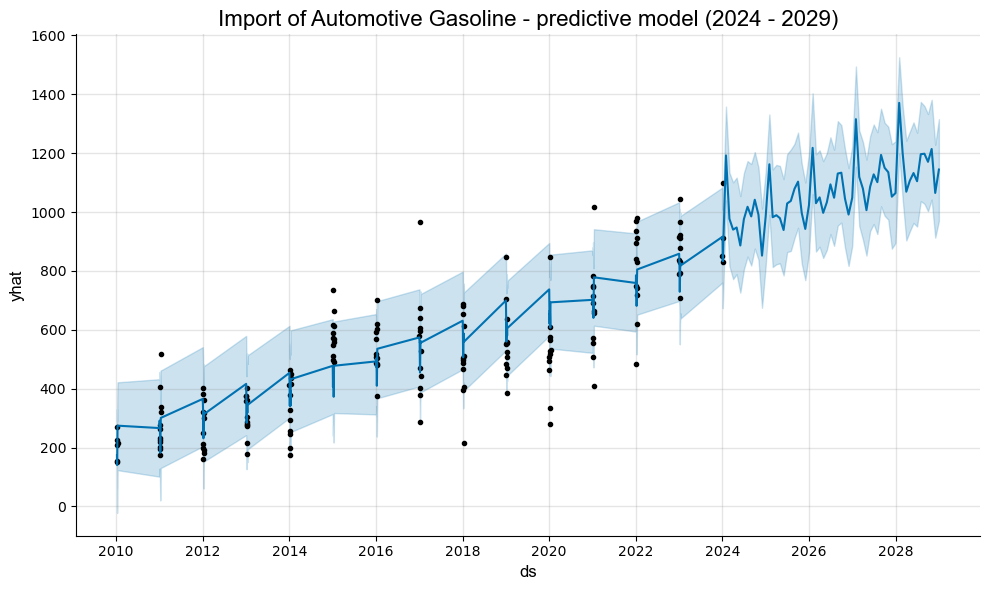

In [1131]:
# Plot forecast - Sale

model_import.plot(forecast_import);

# Font families
font_1 = {'family':'arial','color':'black','size':16}
font_2 = {'family':'arial','color':'black','size':12}

# Labels
plt.title("Import of Automotive Gasoline - predictive model (2024 - 2029)", fontdict = font_1)
plt.xlabel("ds", fontdict = font_2)
plt.ylabel("yhat", fontdict = font_2)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("C:/Users/KN323BT/OneDrive - EY/GitHub/australian-fuel-inventories/images/model_import.png", 
           transparent=False, dpi=300)
plt.show()

C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


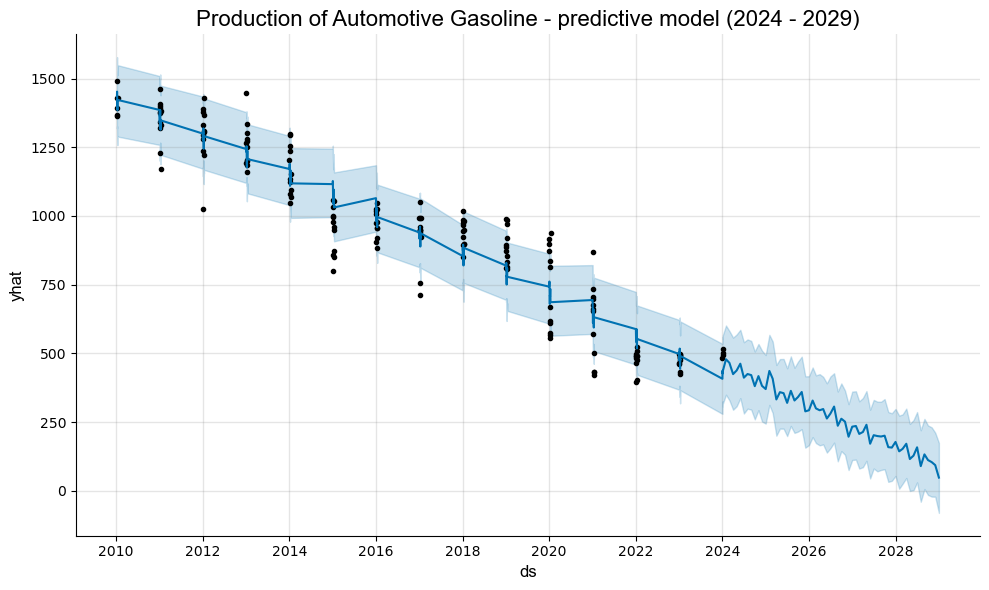

In [1133]:
# Plot forecast - Production

model_production.plot(forecast_production);

# Font families
font_1 = {'family':'arial','color':'black','size':16}
font_2 = {'family':'arial','color':'black','size':12}

# Labels
plt.title("Production of Automotive Gasoline - predictive model (2024 - 2029)", fontdict = font_1)
plt.xlabel("ds", fontdict = font_2)
plt.ylabel("yhat", fontdict = font_2)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("C:/Users/KN323BT/OneDrive - EY/GitHub/australian-fuel-inventories/images/model_production.png", 
           transparent=False, dpi=300)
plt.show()

C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


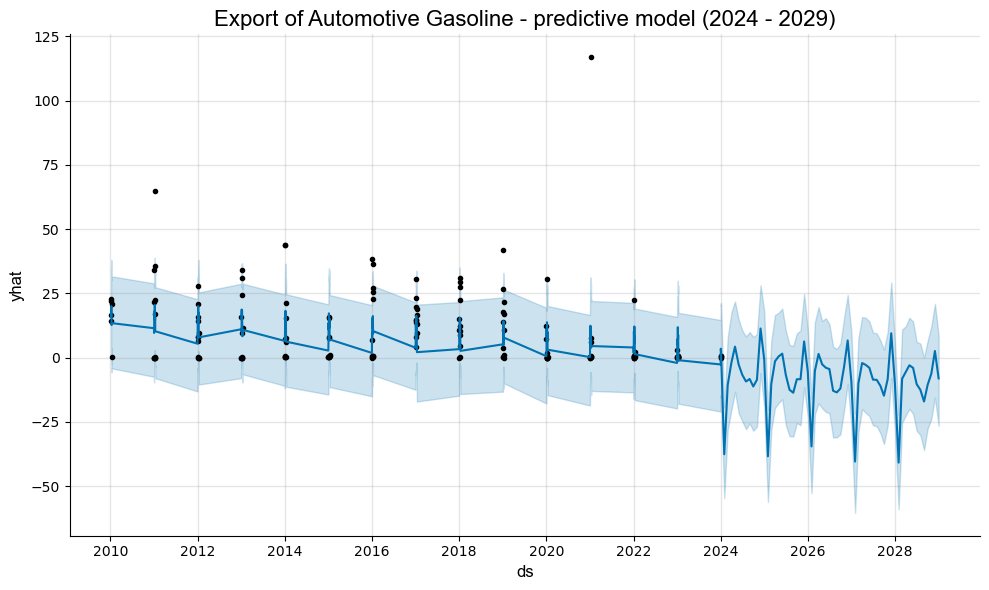

In [1135]:
# Plot forecast - Export

model_export.plot(forecast_export);

# Font families
font_1 = {'family':'arial','color':'black','size':16}
font_2 = {'family':'arial','color':'black','size':12}

# Labels
plt.title("Export of Automotive Gasoline - predictive model (2024 - 2029)", fontdict = font_1)
plt.xlabel("ds", fontdict = font_2)
plt.ylabel("yhat", fontdict = font_2)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("C:/Users/KN323BT/OneDrive - EY/GitHub/australian-fuel-inventories/images/model_export.png", 
           transparent=False, dpi=300)
plt.show()

C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


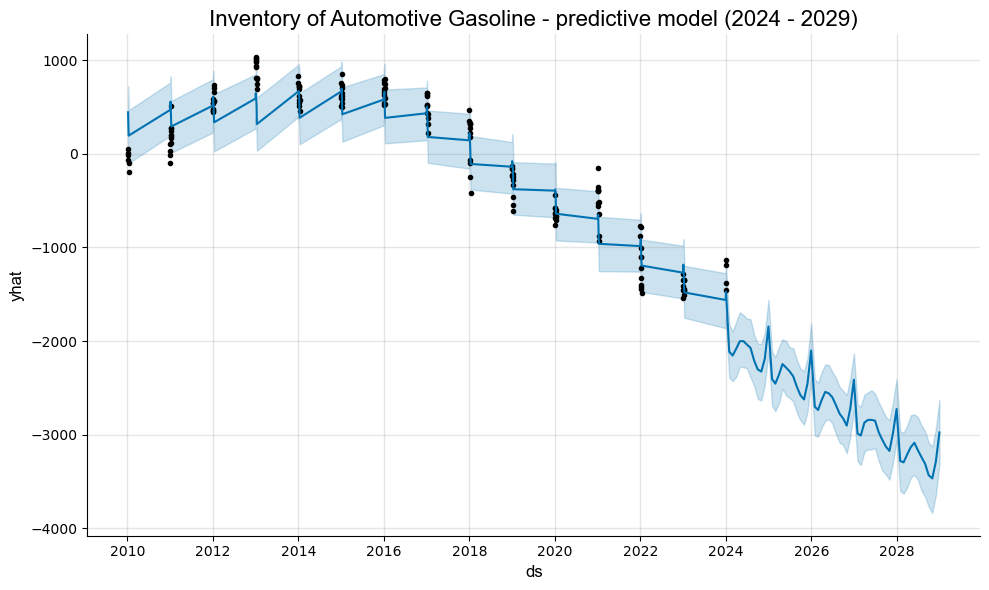

In [1137]:
# Plot forecast - Inventory

model_inventory.plot(forecast_inventory);

# Font families
font_1 = {'family':'arial','color':'black','size':16}
font_2 = {'family':'arial','color':'black','size':12}

# Labels
plt.title("Inventory of Automotive Gasoline - predictive model (2024 - 2029)", fontdict = font_1)
plt.xlabel("ds", fontdict = font_2)
plt.ylabel("yhat", fontdict = font_2)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("C:/Users/KN323BT/OneDrive - EY/GitHub/australian-fuel-inventories/images/model_inventory.png", 
           transparent=False, dpi=300)
plt.show()

In [1139]:
# Combine both dataframes for each variable

vis_sale_df = sale_df.join(forecast_sale[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_import_df = import_df.join(forecast_import[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_production_df = production_df.join(forecast_production[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_export_df = export_df.join(forecast_export[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_inventory_df = inventory_df.join(forecast_inventory[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

print(vis_sale_df.head())
print(vis_import_df.head())
print(vis_production_df.head())
print(vis_export_df.head())
print(vis_inventory_df.head())

          ds       y         yhat   yhat_lower   yhat_upper
0 2010-01-07  1622.0  1578.945095  1482.074014  1676.733761
1 2010-01-08  1629.0  1565.723361  1465.914085  1663.267541
2 2010-01-09  1508.9  1552.841550  1450.324692  1657.647946
3 2010-01-10  1646.1  1602.698228  1498.272343  1700.257971
4 2010-01-11  1648.2  1644.355539  1545.396195  1738.269587
          ds      y        yhat  yhat_lower  yhat_upper
0 2010-01-07  207.3  173.646839    8.837791  331.495515
1 2010-01-08  151.9  140.697583  -21.987074  289.587167
2 2010-01-09  155.8  154.551732   -5.260806  321.356126
3 2010-01-10  225.0  214.664873   58.928093  371.084533
4 2010-01-11  271.5  236.922081   65.050241  404.003600
          ds       y         yhat   yhat_lower   yhat_upper
0 2010-01-07  1493.1  1437.046673  1318.382796  1569.449765
1 2010-01-08  1429.6  1452.605525  1327.225325  1577.923207
2 2010-01-09  1392.6  1418.915845  1288.284768  1534.340328
3 2010-01-10  1362.6  1401.304394  1275.386016  1529.335733
4 20

In [1141]:
# Finalise visualisation
# Set 'ds' as index for both dataframes

vis_sale_df.set_index('ds', inplace=True)
forecast_sale.set_index('ds', inplace=True)

vis_import_df.set_index('ds', inplace=True)
forecast_import.set_index('ds', inplace=True)

vis_production_df.set_index('ds', inplace=True)
forecast_production.set_index('ds', inplace=True)

vis_export_df.set_index('ds', inplace=True)
forecast_export.set_index('ds', inplace=True)

vis_inventory_df.set_index('ds', inplace=True)
forecast_inventory.set_index('ds', inplace=True)

vis_sale_df.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2010-01-07,1622.0,1578.945095,1482.074014,1676.733761
2010-01-08,1629.0,1565.723361,1465.914085,1663.267541
2010-01-09,1508.9,1552.841550,1450.324692,1657.647946
2010-01-10,1646.1,1602.698228,1498.272343,1700.257971
2010-01-11,1648.2,1644.355539,1545.396195,1738.269587


In [1143]:
# Check datatypes

vis_sale_df.dtypes

y             float64
yhat          float64
yhat_lower    float64
yhat_upper    float64
dtype: object

In [1145]:
# Check datatypes of index, just to be sure

index_dtype = vis_sale_df.index.dtype

print(index_dtype)

datetime64[ns]


In [1147]:
# Ensure original and model data are connected

sale_df.index = pd.to_datetime(sale_df.index) #make sure our index as a datetime object
sale_connect_date = sale_df.index[-2] #select the 2nd to last date

import_df.index = pd.to_datetime(import_df.index) #make sure our index as a datetime object
import_connect_date = import_df.index[-2] #select the 2nd to last date

production_df.index = pd.to_datetime(production_df.index) #make sure our index as a datetime object
production_connect_date = production_df.index[-2] #select the 2nd to last date

export_df.index = pd.to_datetime(export_df.index) #make sure our index as a datetime object
export_connect_date = export_df.index[-2] #select the 2nd to last date

inventory_df.index = pd.to_datetime(inventory_df.index) #make sure our index as a datetime object
inventory_connect_date = inventory_df.index[-2] #select the 2nd to last date

In [1149]:
# Mask forecast data

mask_sale = (forecast_sale.index > sale_connect_date)
predict_sale_df = forecast_sale.loc[mask_sale]

mask_import = (forecast_import.index > import_connect_date)
predict_import_df = forecast_import.loc[mask_import]

mask_production = (forecast_production.index > production_connect_date)
predict_production_df = forecast_production.loc[mask_production]

mask_export = (forecast_export.index > export_connect_date)
predict_export_df = forecast_export.loc[mask_export]

mask_inventory = (forecast_inventory.index > inventory_connect_date)
predict_inventory_df = forecast_inventory.loc[mask_inventory]

In [1166]:
# Preview predictions

print(predict_sale_df.head())
print(predict_import_df.head())
print(predict_production_df.head())
print(predict_export_df.head())
print(predict_inventory_df.head())

                  trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
ds                                                                            
2010-01-07  1639.978096  1482.074014  1676.733761  1639.978096  1639.978096   
2010-01-08  1639.932256  1465.914085  1663.267541  1639.932256  1639.932256   
2010-01-09  1639.886417  1450.324692  1657.647946  1639.886417  1639.886417   
2010-01-10  1639.840578  1498.272343  1700.257971  1639.840578  1639.840578   
2010-01-11  1639.794739  1545.396195  1738.269587  1639.794739  1639.794739   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
2010-01-07      -61.033000            -61.033000            -61.033000   
2010-01-08      -74.208895            -74.208895            -74.208895   
2010-01-09      -87.044867            -87.044867            -87.044867   
2010-01-10      -37.142350            -37.142350            -37.142350   
20

C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


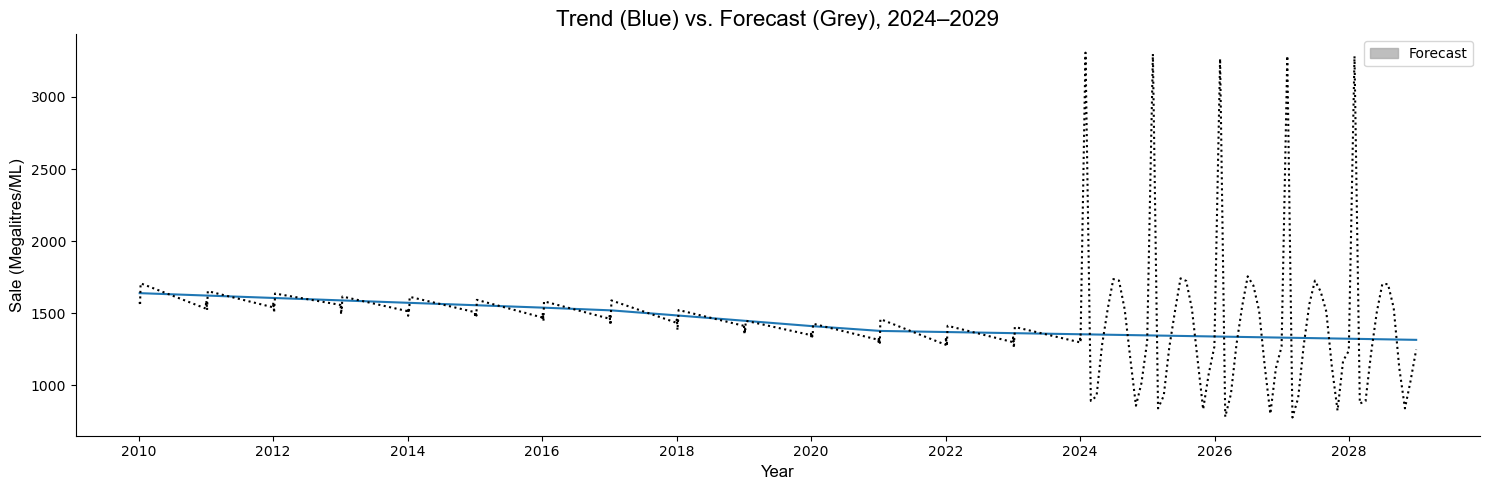

In [1176]:
# Plot final visualisation
#Sale

# Plot
fig, ax1 = plt.subplots()
ax1.plot(predict_sale_df.trend)
ax1.plot(predict_sale_df.yhat, color='black', linestyle=':')

# Fill
ax1.fill_between(predict_sale_df.index, np.exp(predict_sale_df['yhat_upper']), np.exp(predict_sale_df['yhat_lower']), alpha=0.75, 
                 color='darkgray', label = 'Forecast')

# Font families
font_1 = {'family':'arial','color':'black','size':16}
font_2 = {'family':'arial','color':'black','size':12}

# Labels
ax1.set_title('Trend (Blue) vs. Forecast (Grey), 2024–2029', fontdict = font_1)
ax1.set_ylabel('Sale (Megalitres/ML)', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("C:/Users/KN323BT/OneDrive - EY/GitHub/australian-fuel-inventories/images/sale_forecast.png", 
            transparent=False, dpi=300)
plt.show()

C:\Users\KN323BT\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


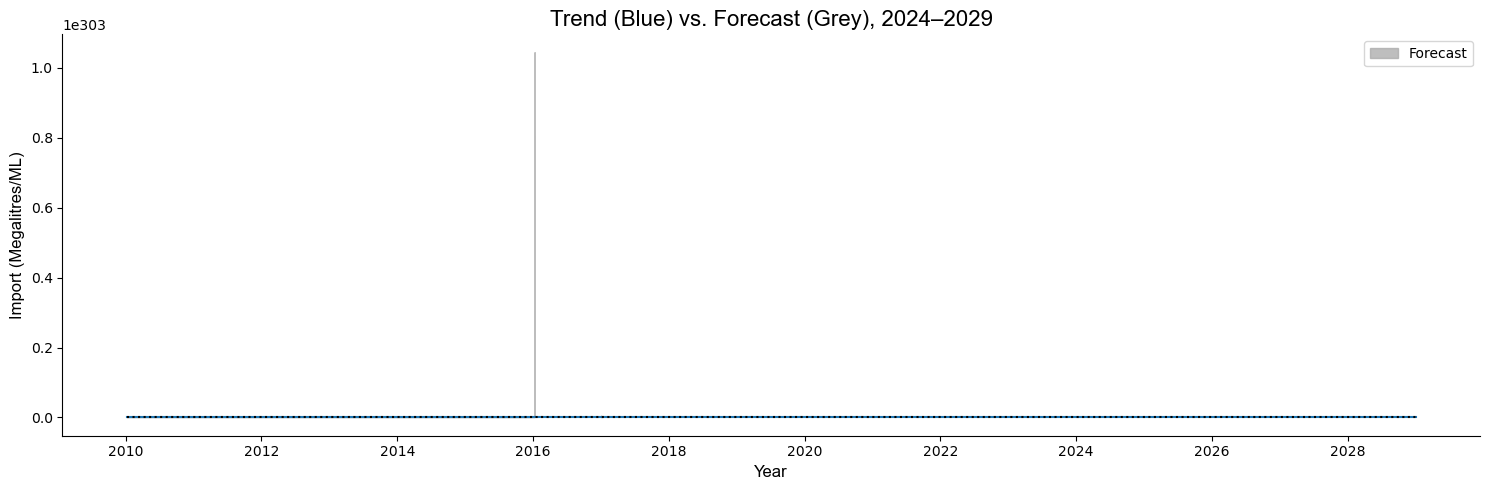

In [1178]:
# Plot final visualisation
# Import

# Plot
fig, ax1 = plt.subplots()
ax1.plot(predict_import_df.trend)
ax1.plot(predict_import_df.yhat, color='black', linestyle=':')

# Fill
ax1.fill_between(predict_import_df.index, np.exp(predict_import_df['yhat_upper']), np.exp(predict_import_df['yhat_lower']), alpha=0.75, 
                 color='darkgray', label = 'Forecast')

# Font families
font_1 = {'family':'arial','color':'black','size':16}
font_2 = {'family':'arial','color':'black','size':12}

# Labels
ax1.set_title('Trend (Blue) vs. Forecast (Grey), 2024–2029', fontdict = font_1)
ax1.set_ylabel('Import (Megalitres/ML)', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("C:/Users/KN323BT/OneDrive - EY/GitHub/australian-fuel-inventories/images/import_forecast.png", 
            transparent=False, dpi=300)
plt.show()

In [ ]:
# ended due to errors